<a href="https://colab.research.google.com/github/Kumarsn680/Covid-simulator/blob/main/Kirtim13_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [ ]:
import random as rn

import numpy as np
import pandas as pd
import os
import glob
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels .tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('/content/Nifty HIstorical Data - ^NSEI (2).csv')
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-11,14474.04981,14498.20020,14383.09961,14484.75000,14484.75000,672900
2021-01-12,14473.79981,14590.65039,14432.84961,14563.45020,14563.45020,929600
2021-01-13,14639.79981,14653.34961,14435.70020,14564.84961,14564.84961,874000
2021-01-14,14550.04981,14617.79981,14471.50000,14595.59961,14595.59961,620200
2021-01-15,14594.34961,14617.45020,14357.84961,14433.70020,14433.70020,789600


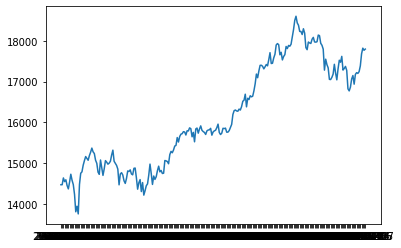

In [ ]:
plt.plot(df['Open'])
# df.loc[[0],:]

# Checking if data is stationary or not

In [ ]:
X = df['Open'].values
result = adfuller(X)
print(f'ADF Statistics : {result[0]}')
print(f'p-value : {result[1]}')
for key,value in result[4].items():
  print(f'{key} :  {value}')
print('Critical Values:')
# DAta is non stationary

ADF Statistics : -0.9427306423827361
p-value : 0.7735752314993223
1% :  -3.457215237265747
5% :  -2.873361841566324
10% :  -2.5730700760129555
Critical Values:


In [ ]:
result =   seasonal_decompose(df['Open'])
result.plot()

AttributeError: ignored

In [ ]:
X = df['High'].values
result = adfuller(X)
print(f'ADF Statistics : {result[0]}')
print(f'p-value : {result[1]}')
for key,value in result[4].items():
  print(f'{key} :  {value}')
print('Critical Values:')
# DAta is non stationary

ADF Statistics : -0.6913316108520786
p-value : 0.8489820874477563
1% :  -3.457437824930831
5% :  -2.873459364726563
10% :  -2.573122099570008
Critical Values:


In [ ]:
X = df['Low'].values
result = adfuller(X)
print(f'ADF Statistics : {result[0]}')
print(f'p-value : {result[1]}')
for key,value in result[4].items():
  print(f'{key} :  {value}')
print('Critical Values:')
# DAta is non stationary

ADF Statistics : -0.9681590076088011
p-value : 0.7646997411081311
1% :  -3.4577787098622674
5% :  -2.873608704758507
10% :  -2.573201765981991
Critical Values:


In [ ]:
X = df['Close'].values
result = adfuller(X)
print(f'ADF Statistics : {result[0]}')
print(f'p-value : {result[1]}')
for key,value in result[4].items():
  print(f'{key} :  {value}')
print('Critical Values:')
# DAta is non stationary

ADF Statistics : -0.8087683477840968
p-value : 0.8165328531402436
1% :  -3.457664132155201
5% :  -2.8735585105960224
10% :  -2.5731749894132916
Critical Values:


In [ ]:
X = df['Adj Close'].values
result = adfuller(X)
print(f'ADF Statistics : {result[0]}')
print(f'p-value : {result[1]}')
for key,value in result[4].items():
  print(f'{key} :  {value}')
print('Critical Values:')
# DAta is non stationary

ADF Statistics : -0.8087683477840968
p-value : 0.8165328531402436
1% :  -3.457664132155201
5% :  -2.8735585105960224
10% :  -2.5731749894132916
Critical Values:


In [ ]:
X = df['Volume'].values
result = adfuller(X)
print(f'ADF Statistics : {result[0]}')
print(f'p-value : {result[1]}')
for key,value in result[4].items():
  print(f'{key} :  {value}')
# DAta is non stationary

ADF Statistics : -1.8490000120430454
p-value : 0.35641994450311343
1% :  -3.458731141928624
5% :  -2.8740258764297293
10% :  -2.5734243167124093
Critical Values:


## Making Data Stationary


**Method 1 - Differencing and Seasonal differencing**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


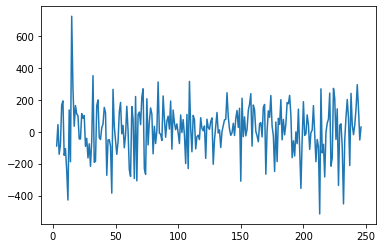

In [ ]:
df['Open_Diff'] = df['Open']  - df['Open'].shift(1)
df = df.dropna()
df.isna().sum()
df['Open_Diff'].plot()

In [ ]:
X = df['Open_Diff'].values
result = adfuller(X)
print(f'ADF Statistics : {result[0]}')
print(f'p-value : {result[1]}')
for key,value in result[4].items():
  print(f'{key} :  {value}')

ADF Statistics : -11.733331978321615
p-value : 1.3256072965883357e-21
1% :  -3.457664132155201
5% :  -2.8735585105960224
10% :  -2.5731749894132916
